# Prepocessing

## import module


In [1]:
import pandas as pd # we are changing num to 0 and 1's cuz we only care if you are going to have a 
import numpy as np # CAD not what type it is. # target, 0, 1
from pandas import read_excel
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import VarianceThreshold
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import functools
from sklearn.ensemble import BaggingClassifier
import pickle

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier


K = 13 # the number of features to be selected by each algorithm
# code obtained from https://scikit-learn.org/stable/modules/feature_selection.html## 
f = open("C:\\Users\\jinhan laptop\\Desktop\\FIT\\FIT3162\\Assignment\\Data_Files\\columnNamesUCI.txt", "r")
file_str = f.read()
f.close()

names = file_str.split("\n")
print(names)

['id', 'ccf', 'age', 'sex', 'painloc', 'painexer', 'relrest', 'pncaden', 'cp', 'trestbps', 'htn', 'chol', 'smoke', 'cigs', 'years', 'fbs', 'dm', 'famhist', 'restecg', 'ekgmo', 'ekgday', 'ekgyr', 'dig', 'prop', 'nitr', 'pro', 'diuretic', 'proto', 'thaldur', 'thaltime', 'met', 'thalach', 'thalrest', 'tpeakbps', 'tpeakbpd', 'dummy', 'trestbpd', 'exang', 'xhypo', 'oldpeak', 'slope', 'rldv5', 'rldv5e', 'ca', 'restckm', 'exerckm', 'restef', 'restwm', 'exeref', 'exerwm', 'thal', 'thalsev', 'thalpul', 'earlobe', 'cmo', 'cday', 'cyr', 'num', 'lmt', 'ladprox', 'laddist', 'diag', 'cxmain', 'ramus', 'om1', 'om2', 'rcaprox', 'rcadist', 'lvx1', 'lvx2', 'lvx3', 'lvx4', 'lvf', 'cathef', 'junk']


## Ready the file and print

In [2]:
fname = "C:\\Users\\jinhan laptop\\Desktop\\FIT\\FIT3162\\Assignment\\Data_Files\\updated_cleveland.data.xlsx"
dataframe = read_excel(fname, header = None, names=names)
print(dataframe)
print("\n\nThe result column is: \n\n",dataframe.num)

      id  ccf  age  sex  painloc  painexer  relrest  pncaden  cp  trestbps  \
0      1    0   63    1       -9        -9       -9       -9   1       145   
1      2    0   67    1       -9        -9       -9       -9   4       160   
2      3    0   67    1       -9        -9       -9       -9   4       120   
3      4    0   37    1       -9        -9       -9       -9   3       130   
4      6    0   41    0       -9        -9       -9       -9   2       130   
5      7    0   56    1       -9        -9       -9       -9   2       120   
6      8    0   62    0       -9        -9       -9       -9   4       140   
7      9    0   57    0       -9        -9       -9       -9   4       120   
8     10    0   63    1       -9        -9       -9       -9   4       130   
9     11    0   53    1       -9        -9       -9       -9   4       140   
10    12    0   57    1       -9        -9       -9       -9   4       140   
11    13    0   56    0       -9        -9       -9       -9   2

## Deal with the empty cell

In [3]:
# fill empty cell with NaN
for i in range(dataframe.shape[0]):
    for column in dataframe.columns:
        if dataframe.at[i, column] == -9:
            dataframe.loc[i, column] = np.nan
# we fill NaN value with the mean of the column containning NaN
df = dataframe.fillna(dataframe.mean())
# we drop the column that contains all NaN value
df = df.dropna(axis=1,how='all')
print("The table after dealing with empty cell\n\ng",df)

The table after dealing with empty cell

g       id  ccf  age  sex  cp  trestbps  htn  chol       cigs      years ...   \
0      1    0   63    1   1       145    1   233  50.000000  20.000000 ...    
1      2    0   67    1   4       160    1   286  40.000000  40.000000 ...    
2      3    0   67    1   4       120    1   229  20.000000  35.000000 ...    
3      4    0   37    1   3       130    0   250   0.000000   0.000000 ...    
4      6    0   41    0   2       130    1   204   0.000000   0.000000 ...    
5      7    0   56    1   2       120    1   236  20.000000  20.000000 ...    
6      8    0   62    0   4       140    0   268   0.000000   0.000000 ...    
7      9    0   57    0   4       120    1   354   0.000000   0.000000 ...    
8     10    0   63    1   4       130    1   254   0.000000   0.000000 ...    
9     11    0   53    1   4       140    0   203  20.000000  25.000000 ...    
10    12    0   57    1   4       140    0   192  75.000000  25.000000 ...    
11    13 

## Remove the column which less impact on the prediction

In [4]:
# we drop dummy column because it is trestbps column, the others is not used for prediction
df = df.drop(['dummy', 'id', 'ekgyr', 'ekgday', 'ekgmo', 'ccf', 'cmo', 'cday', 'cyr'], axis=1)
print("Shape of the data after removing the unpredicted column",df.shape)
myGenderColumn = df["sex"]
myExangColumn = df["exang"]
myFBSColumn = df["fbs"]
myResult = df["num"]
# take 4 important columns we don't want to be eliminate by variance thredshoud from the dataframe
df = df.drop(["sex","exang","fbs","num"],axis=1)
# perform variance thredshold
selector = VarianceThreshold(0.225)
selector.fit(df)
df= df[df.columns[selector.get_support()]]
# add the 4 column back
df = df.join(myExangColumn)
df = df.join(myFBSColumn)
df = df.join(myGenderColumn)
df = df.join(myResult)
print("Shape of the column after removing the low variance column",df.shape)


Shape of the data after removing the unpredicted column (282, 46)
Shape of the column after removing the low variance column (282, 28)


## normalize the data

In [5]:
# returns a numpy array
x = df.values
df_temp = df
# normalize data
min_max_scaler = preprocessing.MinMaxScaler()
min_max_scaler.fit(x)
x_scaled = min_max_scaler.transform(x)
df = pd.DataFrame(x_scaled, columns = df.columns)
# make value in result column a 0,1. Turn it into binary classification
df.loc[df["num"] > 0, "num"] = 1
print(df)

          age        cp  trestbps  htn      chol      cigs     years  famhist  \
0    0.708333  0.000000  0.481132  1.0  0.244292  0.505051  0.370370      1.0   
1    0.791667  1.000000  0.622642  1.0  0.365297  0.404040  0.740741      1.0   
2    0.791667  1.000000  0.245283  1.0  0.235160  0.202020  0.648148      1.0   
3    0.166667  0.666667  0.339623  0.0  0.283105  0.000000  0.000000      1.0   
4    0.250000  0.333333  0.339623  1.0  0.178082  0.000000  0.000000      1.0   
5    0.562500  0.333333  0.245283  1.0  0.251142  0.202020  0.370370      1.0   
6    0.687500  1.000000  0.433962  0.0  0.324201  0.000000  0.000000      1.0   
7    0.583333  1.000000  0.245283  1.0  0.520548  0.000000  0.000000      1.0   
8    0.708333  1.000000  0.339623  1.0  0.292237  0.000000  0.000000      0.0   
9    0.500000  1.000000  0.433962  0.0  0.175799  0.202020  0.462963      1.0   
10   0.583333  1.000000  0.433962  0.0  0.150685  0.757576  0.462963      0.0   
11   0.562500  0.333333  0.4

# Feature Selection

## Prepare data

In [6]:
y = df["num"]
X = df.drop("num",axis=1)
print("The input: \n\n",X)
print("The output: \n\n",y)

The input: 

           age        cp  trestbps  htn      chol      cigs     years  famhist  \
0    0.708333  0.000000  0.481132  1.0  0.244292  0.505051  0.370370      1.0   
1    0.791667  1.000000  0.622642  1.0  0.365297  0.404040  0.740741      1.0   
2    0.791667  1.000000  0.245283  1.0  0.235160  0.202020  0.648148      1.0   
3    0.166667  0.666667  0.339623  0.0  0.283105  0.000000  0.000000      1.0   
4    0.250000  0.333333  0.339623  1.0  0.178082  0.000000  0.000000      1.0   
5    0.562500  0.333333  0.245283  1.0  0.251142  0.202020  0.370370      1.0   
6    0.687500  1.000000  0.433962  0.0  0.324201  0.000000  0.000000      1.0   
7    0.583333  1.000000  0.245283  1.0  0.520548  0.000000  0.000000      1.0   
8    0.708333  1.000000  0.339623  1.0  0.292237  0.000000  0.000000      0.0   
9    0.500000  1.000000  0.433962  0.0  0.175799  0.202020  0.462963      1.0   
10   0.583333  1.000000  0.433962  0.0  0.150685  0.757576  0.462963      0.0   
11   0.562500 

## f_classification selection

In [7]:
selector = SelectKBest(f_classif, k = K)
selector.fit_transform(X,y)
features = selector.get_support(indices = True)
f_classification = [column for column in df.columns[features]]
print(f_classification)

['age', 'cp', 'restecg', 'thaldur', 'met', 'thalach', 'oldpeak', 'slope', 'ca', 'thal', 'lvx4', 'exang', 'sex']


## mutual_info_regression selection

In [8]:
selector = SelectKBest(mutual_info_regression, k = K)
selector.fit_transform(X,y)
features = selector.get_support(indices = True)
mutual_info_regression = [column for column in df.columns[features]]
print(mutual_info_regression)

['cp', 'trestbps', 'chol', 'cigs', 'thaldur', 'thaltime', 'thalach', 'oldpeak', 'ca', 'thal', 'lvx3', 'exang', 'sex']


## f_regression selection

In [9]:
selector = SelectKBest(f_regression, k = K)
selector.fit_transform(X,y)
features = selector.get_support(indices = True)
f_regression = [column for column in df.columns[features]]
print(f_regression)

['age', 'cp', 'restecg', 'thaldur', 'met', 'thalach', 'oldpeak', 'slope', 'ca', 'thal', 'lvx4', 'exang', 'sex']


## Chi2 selection

In [10]:
selector = SelectKBest(chi2, k = K)
selector.fit_transform(X,y)
features = selector.get_support(indices = True)
chi2 = [column for column in df.columns[features]]
print(chi2)

['cp', 'restecg', 'thaldur', 'met', 'thalach', 'oldpeak', 'slope', 'ca', 'thal', 'lvx3', 'lvx4', 'exang', 'sex']


## mutual_info_classif selection

In [11]:
selector = SelectKBest(mutual_info_classif, k = K)
selector.fit_transform(X,y)
features = selector.get_support(indices = True)
mutual_info_classif = [column for column in df.columns[features]]
print(mutual_info_classif)

['cp', 'chol', 'thaldur', 'thaltime', 'thalach', 'oldpeak', 'slope', 'ca', 'thal', 'lvx4', 'exang', 'fbs', 'sex']


## Select feature

In [12]:
features_selected = f_classification + mutual_info_regression + f_regression + chi2 + mutual_info_classif
features_selected.sort()
features_dict = {}
for feature in features_selected:
    if not feature in features_dict:
        features_dict[feature] = features_selected.count(feature)
sorted_features = sorted(features_dict.items(), key=lambda x: x[1], reverse=True)
print(sorted_features)

[('ca', 5), ('cp', 5), ('exang', 5), ('oldpeak', 5), ('sex', 5), ('thal', 5), ('thalach', 5), ('thaldur', 5), ('lvx4', 4), ('slope', 4), ('met', 3), ('restecg', 3), ('age', 2), ('chol', 2), ('lvx3', 2), ('thaltime', 2), ('cigs', 1), ('fbs', 1), ('trestbps', 1)]


In [13]:
# choose the features which are selected by many selector and eliminate not-known feature
features_to_use = []
for feature in sorted_features:
    if feature[1] >= 2:
        if feature[0] != 'lvx4'and feature[0] != 'lvx3' and feature[0] != 'htn' and feature[0] != 'thaltime' and feature[0] != 'met':
            features_to_use.append(feature[0])
print(features_to_use)

['ca', 'cp', 'exang', 'oldpeak', 'sex', 'thal', 'thalach', 'thaldur', 'slope', 'restecg', 'age', 'chol']


In [14]:
X = df[features_to_use] #data used for training
# we need to store the min and range of data feature and the chosen feature for implementing normalization on website
# 's user data.
df_temp = df_temp[features_to_use]
min_max_scaler = preprocessing.MinMaxScaler()
min_max_scaler.fit(df_temp.values) #perform min_max scaler on copy of origin data
min_data = min_max_scaler.data_min_ #min_data of chosen features 
range_data = min_max_scaler.data_range_ #range data of chosen features

def convertToString(arr):
    """
    param: arr: int array
    this function convert the int array to string array
    return: string array
    """
    modified_arr = []
    for item in arr:
        modified_arr.append(str(item))
    return modified_arr
    
min_data=convertToString(min_data)
range_data=convertToString(range_data)

separator = " "
#write the chosen feature and information about chosen feature into chosen_feature.txt
chosen_feature = open("chosen_feature.txt",'w')
chosen_feature.writelines(separator.join(features_to_use)+'\n')
chosen_feature.writelines(separator.join(min_data)+'\n')
chosen_feature.writelines(separator.join(range_data))
chosen_feature.close()
print(X)

           ca        cp  exang   oldpeak  sex      thal   thalach   thaldur  \
0    0.000000  0.000000    0.0  0.370968  1.0  0.750000  0.603053  0.659091   
1    1.000000  1.000000    1.0  0.241935  1.0  0.000000  0.282443  0.583333   
2    0.666667  1.000000    1.0  0.419355  1.0  1.000000  0.442748  0.507576   
3    0.000000  0.666667    0.0  0.564516  1.0  0.000000  0.885496  0.848485   
4    0.000000  0.333333    0.0  0.225806  0.0  0.000000  0.770992  0.393939   
5    0.000000  0.333333    0.0  0.129032  1.0  0.000000  0.816794  0.719697   
6    0.666667  1.000000    0.0  0.580645  0.0  0.000000  0.679389  0.318182   
7    0.000000  1.000000    1.0  0.096774  0.0  0.000000  0.702290  0.545455   
8    0.333333  1.000000    0.0  0.225806  1.0  1.000000  0.580153  0.469697   
9    0.000000  1.000000    1.0  0.500000  1.0  1.000000  0.641221  0.280303   
10   0.000000  1.000000    0.0  0.064516  1.0  0.750000  0.587786  0.484848   
11   0.000000  0.333333    0.0  0.209677  0.0  0.000

# Train model and test the accuracy

In [15]:
num_folds = 10
kf = KFold(n_splits = num_folds)
kf.get_n_splits(X)

10

## support function 

In [16]:
# store result of the model prediction in intermediate_dict
intermediate_dict = {"SVM": [], "LDA": [], "KNN": []}
from sklearn.model_selection import cross_val_score

def k_fold_classifier_acc_tester(clf, my_dict, nameOfColumn, X, y, filename=None):
    """
    this function trains and tests model accuracy by using K-fold method
    params: 
        clf: the model
        my_dict: store the model prediction result 
        nameOfColumn: name of column in dict
        df: data frame contain input
        df_target: output
        filename: name of the file to store the trained model which has the highest accuracy
    return: accuracy array
    """
    
    accuracy_model = []
    models = []
    max_id = 0
    for train_index, test_index in kf.split(X, y):
        X_train , X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
        model = clf.fit(X_train, y_train)
        models.append(model)
        accuracy_model.append(accuracy_score(y_test, model.predict(X_test), normalize=True)*100)
        my_dict[nameOfColumn].extend(model.predict(X_test))
    # write the highest accuracy model to file
    if filename!=None:
        for i in range (len(accuracy_model)):
            if accuracy_model[i]>accuracy_model[max_id]:
                max_id = i
        export_model = models[max_id]
        name = filename+'.pkl'
        pickle.dump(export_model, open(name,'wb'))
    return accuracy_model
        
def plot_function(accuracy, num_folds=10):
    """
    This function plots and calculate the model accuracy
    """
    list_of_fold_names = ["fold" + str(i) for i in range(num_folds)]
    scores = pd.DataFrame(accuracy, columns = ['Scores'])
    sns.set(style="dark", rc={"lines.linewidth": 2})
    sns.barplot(x=list_of_fold_names, y = "Scores", data=scores)
    plt.show()
    sns.set()
    accuracy_summed = functools.reduce(lambda a,b: a + b, accuracy)
    average_acc = accuracy_summed/num_folds
    print("Average accuracy: ",average_acc)
    return average_acc


## SVM model

[89.65517241379311, 86.20689655172413, 85.71428571428571, 96.42857142857143, 82.14285714285714, 85.71428571428571, 75.0, 71.42857142857143, 75.0, 82.14285714285714]


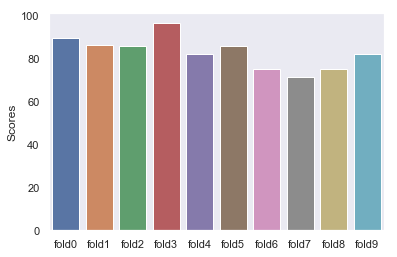

Average accuracy:  82.94334975369458


In [17]:
svm_clf = BaggingClassifier(base_estimator = SVC(gamma = 'auto'), n_estimators = 3, random_state = 0)
svm_accuracy_model = k_fold_classifier_acc_tester(svm_clf, intermediate_dict, "SVM", X, y, "SVM")
print(svm_accuracy_model)
svm_average_acc = plot_function(svm_accuracy_model)

## LDA model

[93.10344827586206, 86.20689655172413, 82.14285714285714, 96.42857142857143, 85.71428571428571, 82.14285714285714, 75.0, 82.14285714285714, 82.14285714285714, 78.57142857142857]


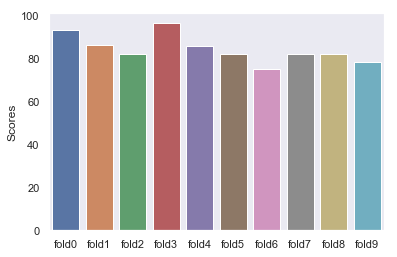

Average accuracy:  84.35960591133004


In [18]:
lda_clf = BaggingClassifier(base_estimator = LinearDiscriminantAnalysis(), n_estimators = 4, random_state = 0)
lda_accuracy_model = k_fold_classifier_acc_tester(lda_clf, intermediate_dict, "LDA", X, y,"LDA")
print(lda_accuracy_model)
lda_average_acc = plot_function(lda_accuracy_model)

## KNN model

In [19]:
average_accuracies_KNN = [] 
num_of_neighbors_to_try_to = 10
for i in range(1, num_of_neighbors_to_try_to + 1):
    accuracy_model = []
    clf = KNeighborsClassifier(n_neighbors = i) 

    accuracy_model = k_fold_classifier_acc_tester(clf, {'KNN': []}, "KNN", X, y)
    accuracy_summed = functools.reduce(lambda a,b: a + b, accuracy_model)

    average_acc = accuracy_summed/num_folds
    average_accuracies_KNN.append(average_acc)
    
max_ave = 0
best_k_val = -1
for i in range(len(average_accuracies_KNN)):
    if max_ave < average_accuracies_KNN[i]:
        max_ave = average_accuracies_KNN[i]
        best_k_val = i + 1
        
print(best_k_val)

5


[82.75862068965517, 86.20689655172413, 78.57142857142857, 92.85714285714286, 78.57142857142857, 89.28571428571429, 75.0, 89.28571428571429, 75.0, 75.0]


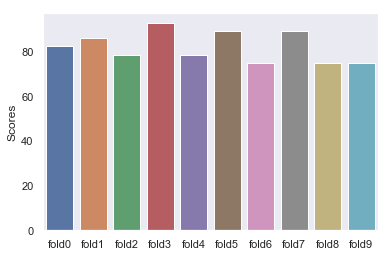

Average accuracy:  82.25369458128078


In [20]:
knn_clf = BaggingClassifier(base_estimator = KNeighborsClassifier(n_neighbors = 5), n_estimators = 5, random_state = 0)
knn_accuracy_model = k_fold_classifier_acc_tester(knn_clf, intermediate_dict, "KNN", X, y, "KNN")
print(knn_accuracy_model)
knn_average_acc = plot_function(knn_accuracy_model)

## SVM 2 model

[89.65517241379311, 86.20689655172413, 82.14285714285714, 96.42857142857143, 85.71428571428571, 85.71428571428571, 75.0, 71.42857142857143, 75.0, 78.57142857142857]


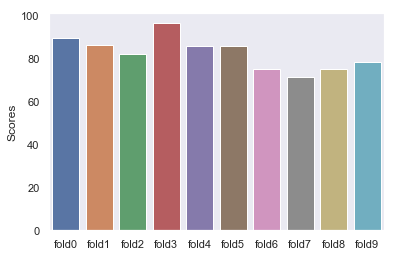

Average accuracy:  82.58620689655172


In [21]:
intermediate_df = pd.DataFrame(intermediate_dict)
svm_clf_2 = BaggingClassifier(base_estimator = SVC(kernel = 'rbf', gamma = 'auto'), n_estimators = 4, random_state = 0)
svm_accuracy_model_2 = k_fold_classifier_acc_tester(svm_clf_2, {'NA':[]}, "NA", intermediate_df, y, "SVM2")
print(svm_accuracy_model_2)
svm_average_acc_2 = plot_function(svm_accuracy_model_2)

## Voting model

In [22]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

[89.65517241379311, 86.20689655172413, 82.14285714285714, 96.42857142857143, 82.14285714285714, 85.71428571428571, 75.0, 85.71428571428571, 78.57142857142857, 78.57142857142857]


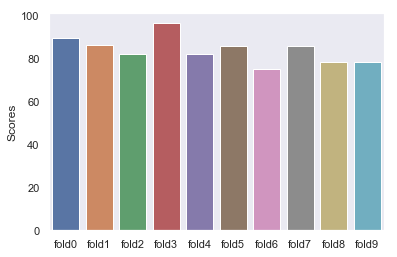

Average accuracy:  84.01477832512315


In [23]:
estimators = [('knn', knn_clf), ('svm', svm_clf), ('lda', lda_clf)]
voting_clf = VotingClassifier(estimators = estimators, voting='hard')
voting_accuracy_model = k_fold_classifier_acc_tester(voting_clf, {'NA':[]}, "NA", X, y, "Voting")
print(voting_accuracy_model)
voting_average_acc = plot_function(voting_accuracy_model)

## Voting 2 model

[89.65517241379311, 86.20689655172413, 82.14285714285714, 96.42857142857143, 82.14285714285714, 82.14285714285714, 75.0, 71.42857142857143, 75.0, 78.57142857142857]


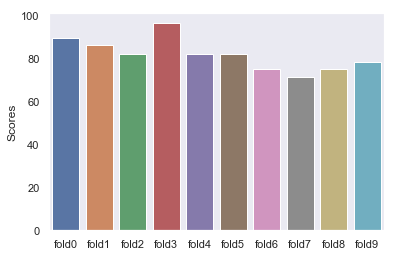

Average accuracy:  81.87192118226601


In [24]:
estimators = [('knn', knn_clf), ('svm', svm_clf), ('lda', lda_clf)]
voting_clf_2 = VotingClassifier(estimators = estimators, voting='hard')
voting_accuracy_model_2 = k_fold_classifier_acc_tester(voting_clf_2, {'NA':[]}, "NA", intermediate_df, y, "Voting2")
print(voting_accuracy_model_2)
voting2_average_acc = plot_function(voting_accuracy_model_2)

## Accuracy Overview

The average accuracy: 

         SVM        LDA        KNN      SVM_2     voting   voting_2
0  82.94335  84.359606  82.253695  82.586207  84.014778  81.871921


,SVM,LDA,KNN,SVM_2,voting,voting_2
0,89.655172,93.103448,82.758621,89.655172,89.655172,89.655172
1,86.206897,86.206897,86.206897,86.206897,86.206897,86.206897
2,85.714286,82.142857,78.571429,82.142857,82.142857,82.142857
3,96.428571,96.428571,92.857143,96.428571,96.428571,96.428571
4,82.142857,85.714286,78.571429,85.714286,82.142857,82.142857
5,85.714286,82.142857,89.285714,85.714286,85.714286,82.142857
6,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000
7,71.428571,82.142857,89.285714,71.428571,85.714286,71.428571
8,75.000000,82.142857,75.000000,75.000000,78.571429,75.000000
9,82.142857,78.571429,75.000000,78.571429,78.571429,78.571429


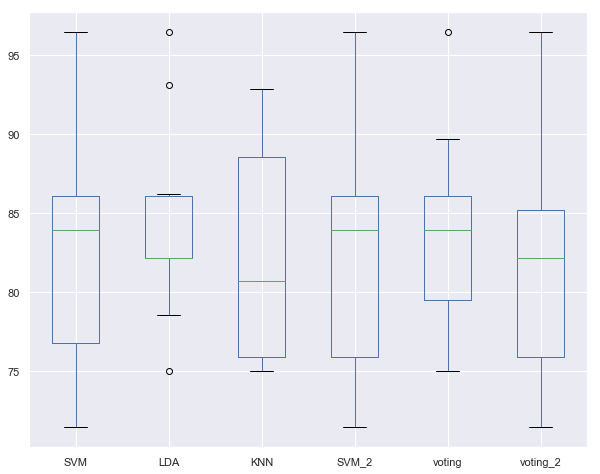

In [25]:
average_accuracy_dict = {'SVM': [svm_average_acc], 'LDA': [lda_average_acc], 'KNN': [knn_average_acc],'SVM_2': [svm_average_acc_2], 'voting':[voting_average_acc], 'voting_2':[voting2_average_acc]}
average_acc_df = pd.DataFrame(average_accuracy_dict)
print("The average accuracy: \n\n",average_acc_df)
accuracy_boxplot_dict = {'SVM': svm_accuracy_model, 'LDA': lda_accuracy_model, 'KNN': knn_accuracy_model, 'SVM_2': svm_accuracy_model_2 , 'voting':voting_accuracy_model, 'voting_2':voting_accuracy_model_2}
boxplot_df = pd.DataFrame(accuracy_boxplot_dict)
accuracy_boxplot = boxplot_df.boxplot(figsize=(10,8))
boxplot_df

# Test Accuracy on other dataset

In [26]:
fname = "C:\\Users\\jinhan laptop\\Desktop\\FIT\\FIT3162\\Assignment\\Data_Files\\updated_hungarian.xlsx"
dataframe = read_excel(fname, header = None, names=names)
print("The origin data: \n\n\n",dataframe)


# fill empty cell with NaN
for i in range(dataframe.shape[0]):
    for column in dataframe.columns:
        if dataframe.at[i, column] == -9:
            dataframe.loc[i, column] = np.nan
# we fill NaN value with the mean of the column containning NaN
df = dataframe.fillna(dataframe.mean())
# we drop the column that contains all NaN value
df = df.dropna(axis=1,how='all')
print("\n\n\nThe table after dealing with empty cell\n\ng",df)


# we drop dummy column because it is trestbps column, the others is not used for prediction
df = df.drop(['dummy', 'id', 'ekgyr', 'ekgday', 'ekgmo', 'ccf', 'cmo', 'cday', 'cyr'], axis=1)
print("\n\n\nShape of the data after removing the unpredicted column",df.shape)


# returns a numpy array
x = df.values
df_temp = df
# normalize data
min_max_scaler = preprocessing.MinMaxScaler()
min_max_scaler.fit(x)
x_scaled = min_max_scaler.transform(x)
df = pd.DataFrame(x_scaled, columns = df.columns)
# make value in result column a 0,1. Turn it into binary classification
df.loc[df["num"] > 0, "num"] = 1
print("After normalize the data",df)

The origin data: 


        id  ccf  age  sex  painloc  painexer  relrest  pncaden  cp  trestbps  \
0    1254    0   40    1        1         0        0       -9   2       140   
1    1255    0   49    0        1         0        0       -9   3       160   
2    1256    0   37    1        1         0        0       -9   2       130   
3    1257    0   48    0        1         1        1       -9   4       138   
4    1258    0   54    1        1         0        1       -9   3       150   
5    1259    0   39    1        1         0        1       -9   3       120   
6    1260    0   45    0        0         1        0       -9   2       130   
7    1261    0   54    1        1         0        0       -9   2       110   
8    1262    0   37    1        1         1        1       -9   4       140   
9    1263    0   48    0        1         0        0       -9   2       120   
10   1264    0   37    0        1         0        1       -9   3       130   
11   1265    0   58    1       




The table after dealing with empty cell

g        id  ccf  age  sex  painloc  painexer  relrest  cp    trestbps  htn  \
0    1254    0   40    1        1         0        0   2  140.000000  0.0   
1    1255    0   49    0        1         0        0   3  160.000000  1.0   
2    1256    0   37    1        1         0        0   2  130.000000  0.0   
3    1257    0   48    0        1         1        1   4  138.000000  0.0   
4    1258    0   54    1        1         0        1   3  150.000000  0.0   
5    1259    0   39    1        1         0        1   3  120.000000  0.0   
6    1260    0   45    0        0         1        0   2  130.000000  0.0   
7    1261    0   54    1        1         0        0   2  110.000000  0.0   
8    1262    0   37    1        1         1        1   4  140.000000  1.0   
9    1263    0   48    0        1         0        0   2  120.000000  0.0   
10   1264    0   37    0        1         0        1   3  130.000000  0.0   
11   1265    0   58    1      

In [27]:
X = df[features_to_use]
y = df['num']
X

,ca,cp,exang,oldpeak,sex,thal,thalach,thaldur,slope,restecg,age,chol
0,0.25,0.333333,0.000000,0.00,1.0,0.660714,0.833333,0.739130,0.447115,0.0,0.315789,0.393822
1,0.25,0.666667,0.000000,0.20,0.0,0.660714,0.685185,0.391304,0.500000,0.0,0.552632,0.183398
2,0.25,0.333333,0.000000,0.00,1.0,0.660714,0.148148,0.391304,0.447115,0.5,0.236842,0.382239
3,0.25,1.000000,1.000000,0.30,0.0,0.660714,0.240741,0.173913,0.500000,0.0,0.526316,0.249035
4,0.25,0.666667,0.000000,0.00,1.0,0.660714,0.370370,0.043478,0.447115,0.0,0.684211,0.320171
5,0.25,0.666667,0.000000,0.00,1.0,0.660714,0.814815,0.782609,0.447115,0.0,0.289474,0.490347
6,0.25,0.333333,0.000000,0.00,0.0,0.660714,0.814815,0.391304,0.447115,0.0,0.447368,0.293436
7,0.25,0.333333,0.000000,0.00,1.0,0.660714,0.555556,0.782609,0.447115,0.0,0.684211,0.237452
8,0.25,1.000000,1.000000,0.30,1.0,0.660714,0.444444,0.608696,0.500000,0.0,0.236842,0.235521
9,0.25,0.333333,0.000000,0.00,0.0,0.660714,0.351852,0.260870,0.447115,0.0,0.526316,0.384170


In [28]:
svm_clf_score = svm_clf.score(X, y) * 100
lda_clf_score = lda_clf.score(X, y) * 100
knn_clf_score = knn_clf.score(X, y) * 100
voting_clf_score = voting_clf.score(X, y) * 100

svm_clf_predictions = svm_clf.predict(X)
lda_clf_predictions = lda_clf.predict(X)
knn_clf_predictions = knn_clf.predict(X)
voting_clf_prediction = voting_clf.predict(X)
intermediate_dict = {'SVM': svm_clf_predictions, 'LDA': lda_clf_predictions, 'KNN': knn_clf_predictions}
intermediate_df = pd.DataFrame(intermediate_dict)
intermediate_df_copy = intermediate_df

voting_clf_score2 = voting_clf_2.score(intermediate_df, y) * 100
voting_clf_prediction_2 = voting_clf_2.predict(intermediate_df)

svm_clf_score2 = svm_clf_2.score(intermediate_df,y) * 100
svm_clf_predictions_2 = svm_clf_2.predict(intermediate_df)

intermediate_dict['SVM_2'] = svm_clf_predictions_2
intermediate_dict['voting'] = voting_clf_prediction
intermediate_dict['voting_2'] = voting_clf_prediction_2

intermediate_df = pd.DataFrame(intermediate_dict)

models = {'SVM': svm_clf, 'LDA': lda_clf, 'KNN': knn_clf, 'SVM_2': svm_clf_2, 'voting': voting_clf, 'voting_2': voting_clf_2}

print("svm accuracy score: ",svm_clf_score)
print("lda accuracy score: ",lda_clf_score)
print("knn accuracy score: ",knn_clf_score)
print("svm 2 accuracy score: ",svm_clf_score2)
print("voting accuracy score: ",voting_clf_score)
print("voting 2 accuracy score: ",voting_clf_score2)

svm accuracy score:  79.93197278911565
lda accuracy score:  80.61224489795919
knn accuracy score:  81.29251700680273
svm 2 accuracy score:  80.61224489795919
voting accuracy score:  81.29251700680273
voting 2 accuracy score:  80.61224489795919


,SVM,LDA,KNN,SVM_2,voting,voting_2,SVM_other,LDA_other,KNN_other,SVM_2_other,voting_other,voting_2_other
0,82.94335,84.359606,82.253695,82.586207,84.014778,81.871921,79.931973,80.612245,81.292517,80.612245,81.292517,80.612245


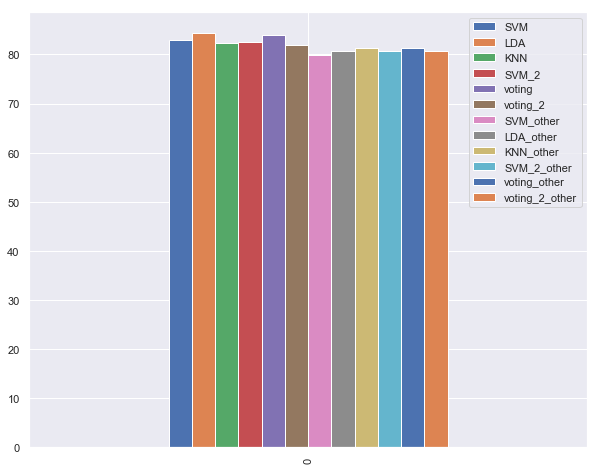

In [29]:
accuracy_dict = {'SVM': [svm_average_acc], 'LDA': [lda_average_acc], 'KNN': [knn_average_acc], 'SVM_2': [svm_average_acc_2], 'voting':[voting_average_acc], 'voting_2':[voting2_average_acc],'SVM_other': [svm_clf_score], 'LDA_other': [lda_clf_score], 'KNN_other': [knn_clf_score], 'SVM_2_other': [svm_clf_score2], 'voting_other':[voting_clf_score], 'voting_2_other':[voting_clf_score2]}
accuracy_df = pd.DataFrame(accuracy_dict)
accuracy_df.plot.bar(figsize=(10,8))
accuracy_df

# Precision and Recall

In [30]:
def recall_precision(predict, real):
    true_positive = 0
    false_positive = 0
    false_negative = 0
    for i in range (len(predict)):
        if predict[i] == 1:
            if real[i] == 1:
                true_positive+=1
            else:
                false_positive+=1
        else:
            if real[i] == 1:
                false_negative+=1
    precision = true_positive/(true_positive+false_positive)
    recall = true_positive/(true_positive+false_negative)
    return precision, recall

In [31]:
methods = intermediate_df.columns.values
recall_precision_acc = {}
for method in methods:
    precision, recall = recall_precision(intermediate_dict[method],y.values)
    recall_precision_acc[method] = [precision, recall]
recall_precision_acc_df = pd.DataFrame(recall_precision_acc,index=['Precision','Recall'])
recall_precision_acc_df
    

,SVM,LDA,KNN,SVM_2,voting,voting_2
Precision,0.664336,0.676259,0.688889,0.676259,0.683453,0.676259
Recall,0.896226,0.886792,0.877358,0.886792,0.896226,0.886792


# AUCROC

model SVM :    auc:       82.04536330790847 
               auc_roc:   82.04536330790847
model LDA :    auc:       82.37153753512645 
               auc_roc:   82.37153753512645
model KNN :    auc:       82.69771176234444 
               auc_roc:   82.69771176234444
model SVM_2 :    auc:       82.37153753512645 
               auc_roc:   82.37153753512645
model voting :    auc:       83.10919309514252 
               auc_roc:   83.10919309514252
model voting_2 :    auc:       82.37153753512645 
               auc_roc:   82.37153753512645


,SVM,LDA,KNN,SVM_2,voting,voting_2
0,82.045363,82.371538,82.697712,82.371538,83.109193,82.371538


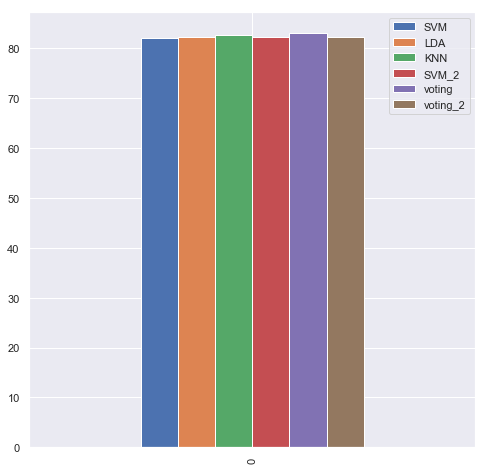

In [32]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
auc_dict = {}
def auroc_score(method):
    input_data = X
    if method == 'SVM_2' or method == 'voting_2':
        input_data = intermediate_df_copy
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y, models[method].predict(input_data))
    auc_model = auc(false_positive_rate,true_positive_rate)*100
    auc_roc_model = roc_auc_score(y, models[method].predict(input_data))*100
    print('model '+method+' :'+'    auc:      ',auc_model,'\n               auc_roc:  ',auc_roc_model)
    
    return auc_model

for method in methods:
    auc_dict[method] = [auroc_score(method)]
auc_df = pd.DataFrame(auc_dict)
auc_df.plot.bar(figsize=(8,8))
auc_df